In [42]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import lineStyles

In [43]:
df=sns.load_dataset('flights')
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [44]:
df['yearmonth']='01'+df['month'].astype(str)+df['year'].astype(str)
df['yearmonth']=pd.to_datetime(df.yearmonth)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   year        144 non-null    int64         
 1   month       144 non-null    category      
 2   passengers  144 non-null    int64         
 3   yearmonth   144 non-null    datetime64[ns]
dtypes: category(1), datetime64[ns](1), int64(2)
memory usage: 4.0 KB


In [45]:
df.set_index('yearmonth',inplace=True)
df

,year,month,passengers
yearmonth,,,
1949-01-01,1949,Jan,112
1949-02-01,1949,Feb,118
1949-03-01,1949,Mar,132
1949-04-01,1949,Apr,129
1949-05-01,1949,May,121
...,...,...,...
1960-08-01,1960,Aug,606
1960-09-01,1960,Sep,508
1960-10-01,1960,Oct,461


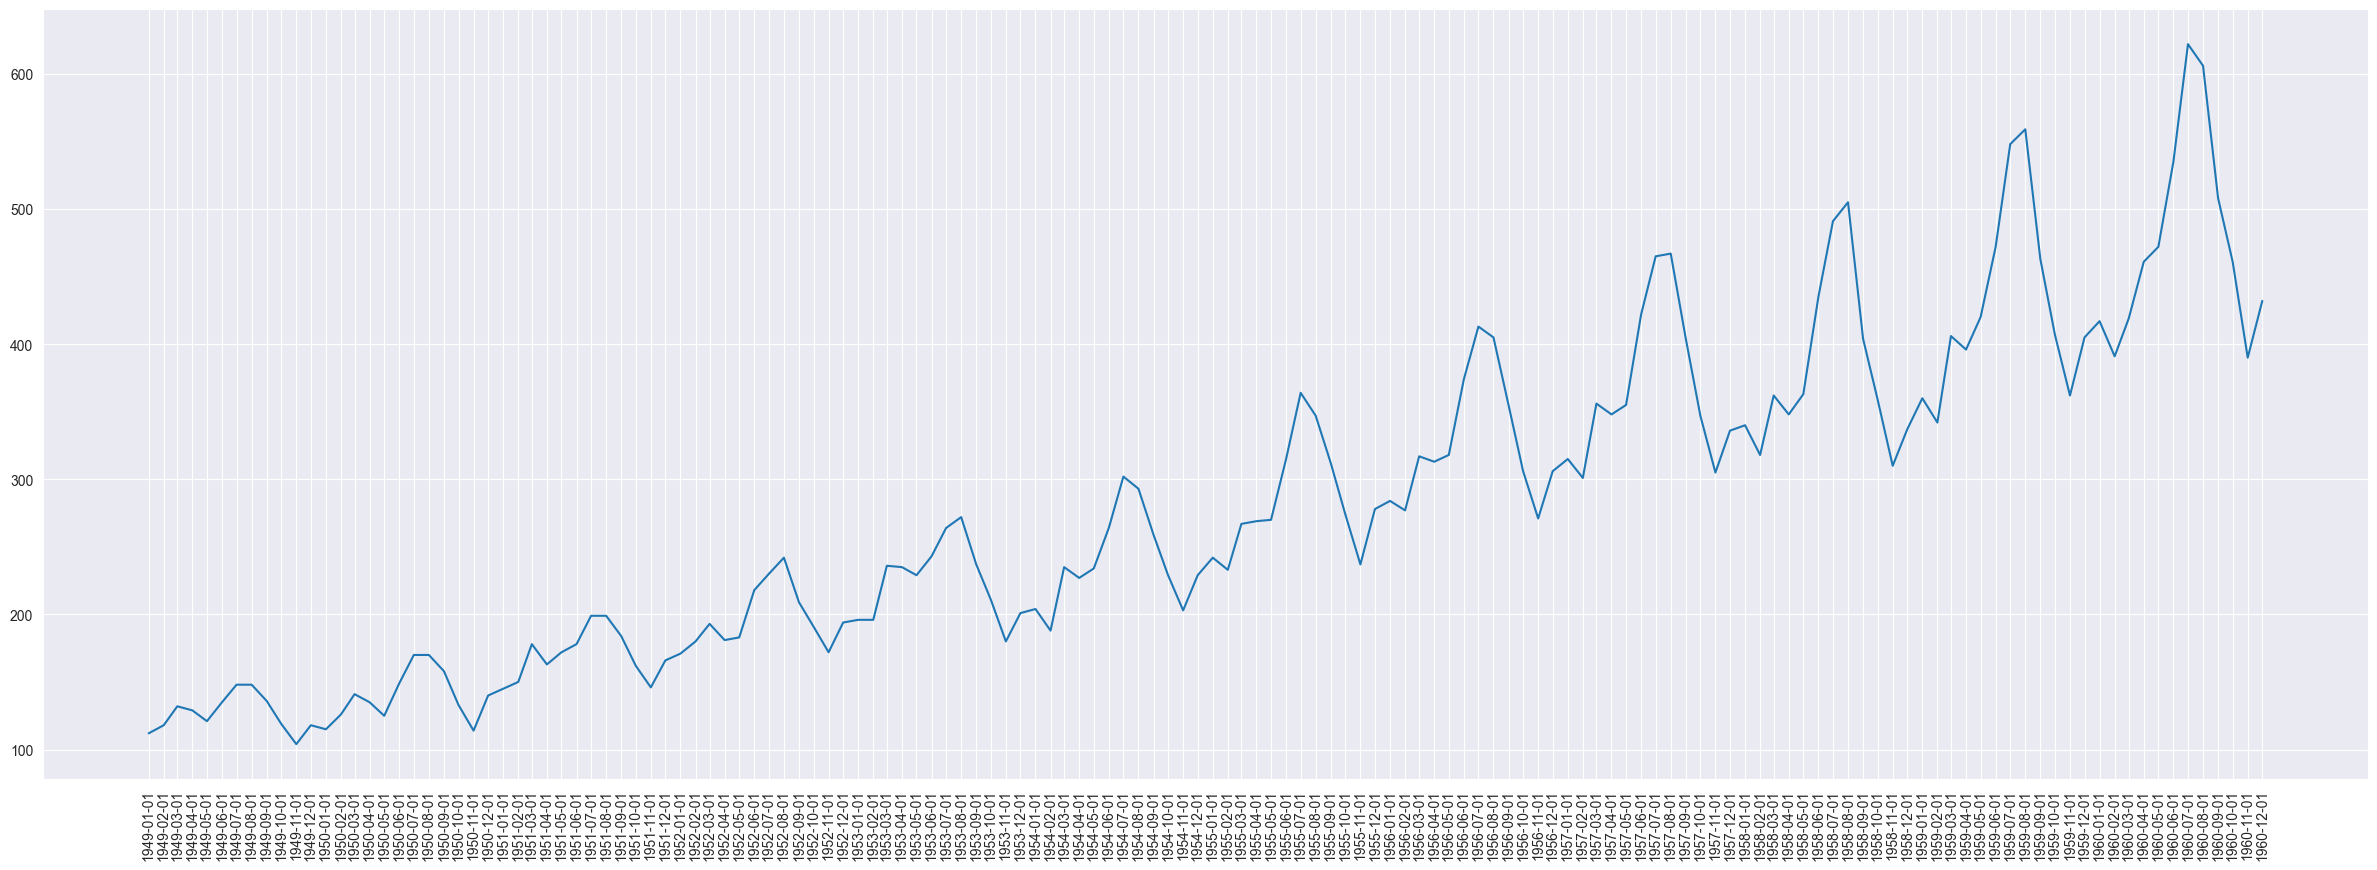

In [64]:
plt.figure(figsize=(30,10))
plt.plot(df.index,df.passengers)
plt.xticks(labels=df.index.astype(str),ticks=df.index,rotation=90)
plt.show()

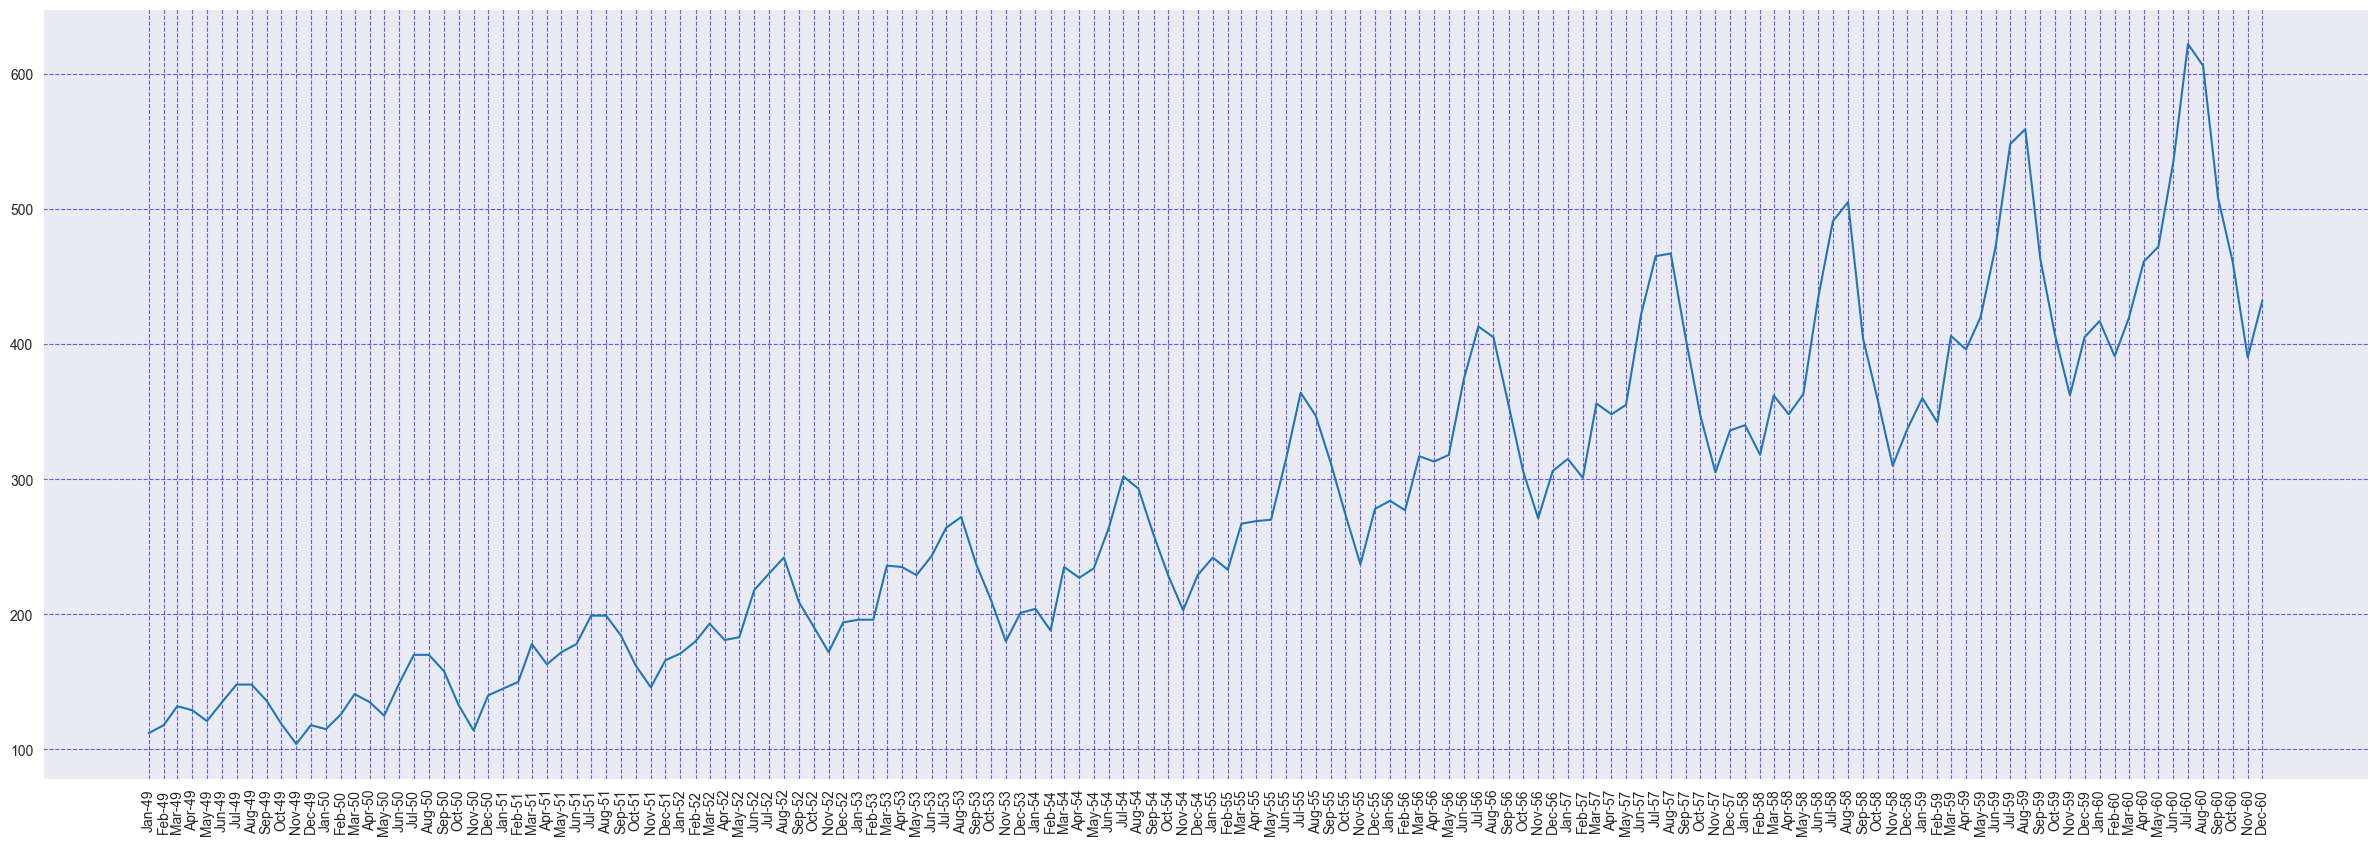

In [74]:
df['yearmonth']=df.index
plt.figure(figsize=(30,10))
plt.plot(df.index,df.passengers)
plt.xticks(labels=df.yearmonth.dt.strftime("%b-%y"),ticks=df.yearmonth,rotation=90)
plt.grid(linestyle='--',alpha=0.6,color='blue')
plt.show()

In [77]:
df['rolling_mean']=df['passengers'].rolling(window=12).mean()
df['rolling_std']=df['passengers'].rolling(window=12).std()
df

,year,month,passengers,yearmonth,rolling_mean,rolling_std
yearmonth,,,,,,
1949-01-01,1949,Jan,112,1949-01-01,NaN,NaN
1949-02-01,1949,Feb,118,1949-02-01,NaN,NaN
1949-03-01,1949,Mar,132,1949-03-01,NaN,NaN
1949-04-01,1949,Apr,129,1949-04-01,NaN,NaN
1949-05-01,1949,May,121,1949-05-01,NaN,NaN
...,...,...,...,...,...,...
1960-08-01,1960,Aug,606,1960-08-01,463.333333,83.630500
1960-09-01,1960,Sep,508,1960-09-01,467.083333,84.617276
1960-10-01,1960,Oct,461,1960-10-01,471.583333,82.541954


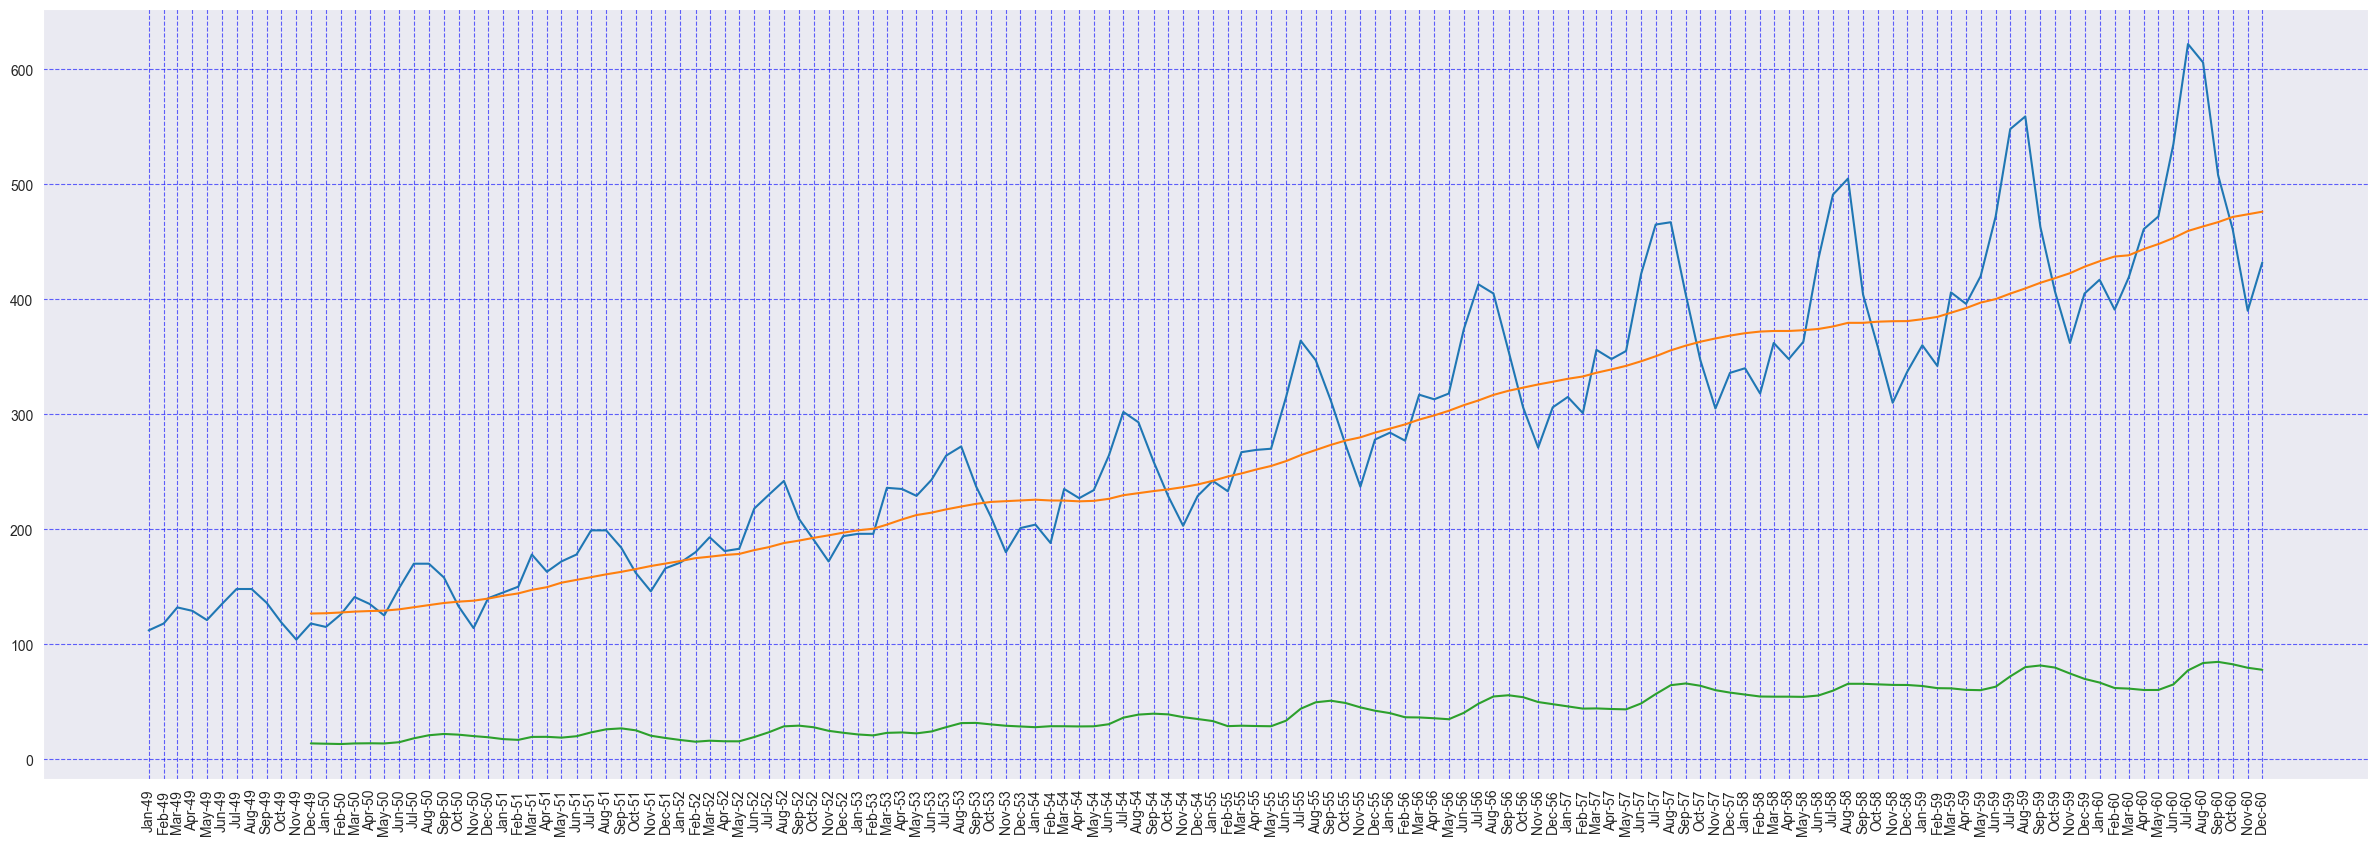

In [78]:
df['yearmonth']=df.index
plt.figure(figsize=(30,10))
plt.plot(df.index,df.passengers)
plt.plot(df.rolling_mean)
plt.plot(df.rolling_std)
plt.xticks(labels=df.yearmonth.dt.strftime("%b-%y"),ticks=df.yearmonth,rotation=90)
plt.grid(linestyle='--',alpha=0.6,color='blue')
plt.show()